In [1]:
import pandas as pd
df = pd.read_csv("../data/games.csv")

In [2]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
from chess import Board
moves = df.iloc[0].moves

In [4]:
moves

'd4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4'

In [5]:
import chess
board = chess.Board()

# Apply each move to the board
for move in moves.split():
    board.push_san(move)

# Print the final board
print(board)

r n b q k . n r
p p . . . . p p
. . p . p . . .
b . . . . . . .
. . . P . B . .
. . N . . N . .
P P . . P P P P
R . . Q K B . R


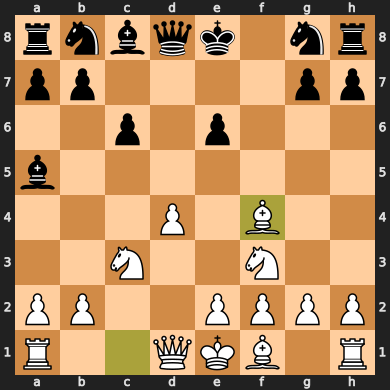

In [6]:
board

In [68]:
import numpy as np
def board_to_3d_array(board):
    piece_to_index = {'p': 0, 'n': 1, 'b': 2, 'r': 3, 'q': 4, 'k': 5,
                      'P': 6, 'N': 7, 'B': 8, 'R': 9, 'Q': 10, 'K': 11}

    board_3d_array = np.zeros((8, 8, 12), dtype=np.int8)

    for square in chess.SQUARES:
        piece = board.piece_at(square)
        if piece is not None:
            piece_index = piece_to_index[piece.symbol()]
            board_3d_array[chess.square_rank(square)][chess.square_file(square)][piece_index] = 1

    return board_3d_array.astype("int8")


result = {
        "white": 1,
        "draw": 0,
        "black": -1
    }

def get_states(row):
    board = Board()
    boards = [board_to_3d_array(board)]
    for move in row.moves.split():
        board.push_san(move)
        boards.append(board_to_3d_array(board))
    return pd.Series({
            "board": boards,
            "score": [result[row.winner]] * len(boards)
    })
df_1500 = df[(df.white_rating > 1500) & (df.black_rating > 1500) & (df.rated)]
train, test = train_test_split(df_1500)
train_df = pd.concat([get_states(row) for _, row in train.iterrows()], axis=1).T
test_df = pd.concat([get_states(row) for _, row in test.iterrows()], axis=1).T

In [69]:
train_df

,board,score
0,"[[[[0 0 0 0 0 0 0 0 0 1 0 0], [0 0 0 0 0 0 0 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[[[[0 0 0 0 0 0 0 0 0 1 0 0], [0 0 0 0 0 0 0 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[[[[0 0 0 0 0 0 0 0 0 1 0 0], [0 0 0 0 0 0 0 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[[[[0 0 0 0 0 0 0 0 0 1 0 0], [0 0 0 0 0 0 0 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,"[[[[0 0 0 0 0 0 0 0 0 1 0 0], [0 0 0 0 0 0 0 1...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
...,...,...
6091,"[[[[0 0 0 0 0 0 0 0 0 1 0 0], [0 0 0 0 0 0 0 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
6092,"[[[[0 0 0 0 0 0 0 0 0 1 0 0], [0 0 0 0 0 0 0 1...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
6093,"[[[[0 0 0 0 0 0 0 0 0 1 0 0], [0 0 0 0 0 0 0 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
6094,"[[[[0 0 0 0 0 0 0 0 0 1 0 0], [0 0 0 0 0 0 0 1...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."


In [70]:
train_boards = train_df.apply(lambda col: col.explode(), axis=0)
test_boards = test_df.apply(lambda col: col.explode(), axis=0)

In [72]:
train_boards

,board,score
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0,...",0
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0,...",0
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0,...",0
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0,...",0
0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0,...",0
...,...,...
6095,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0,...",-1
6095,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0,...",-1
6095,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0,...",-1
6095,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0,...",-1


In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv3D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Sample DataFrame
# Assuming df contains 'board' column with 8x8x12 arrays and 'winner' column
# ...

# Preprocess the Data
X_train = np.stack(train_boards['board'].values)  # Convert the 'board' column to a 4D NumPy array
y_train = train_boards['score'].values.astype('float32')

X_test = np.stack(test_boards['board'].values)  # Convert the 'board' column to a 4D NumPy array
y_test = test_boards['score'].values.astype('float32')

# Build the Model
model = Sequential()
model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 12)))

model.add(Flatten())


# Output Layer
model.add(Dense(1, activation='tanh'))

# Compile the Model
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])  # Using mean squared error for regression

# Train the Model
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

# Evaluate the Model
mse, mae = model.evaluate(X_test, y_test)
print(f"Test Mean Squared Error: {mse}")
print(f"Test Mean Absolute Error: {mae}")

Epoch 1/15
5201/5201 [==============================] - 15s 3ms/step - loss: 0.8594 - mae: 0.8760 - val_loss: 0.8495 - val_mae: 0.8570
Epoch 2/15
5201/5201 [==============================] - 14s 3ms/step - loss: 0.8030 - mae: 0.8245 - val_loss: 0.8398 - val_mae: 0.8425
Epoch 3/15
5201/5201 [==============================] - 14s 3ms/step - loss: 0.7907 - mae: 0.8117 - val_loss: 0.8338 - val_mae: 0.8338
Epoch 4/15
5201/5201 [==============================] - 14s 3ms/step - loss: 0.7840 - mae: 0.8046 - val_loss: 0.8281 - val_mae: 0.8280
Epoch 5/15
4341/5201 [========================>.....] - ETA: 1s - loss: 0.7782 - mae: 0.7991

KeyboardInterrupt: 

In [85]:
model.predict(np.expand_dims(board_to_3d_array(Board()), axis=0))

1/1 [==============================] - 0s 66ms/step


array([[0.06636652]], dtype=float32)

In [86]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [87]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append('..')
class ModelEstimator:
    def __init__(self, model):
        self.model = model
    def __call__(self, board):
        result = self.model.predict(np.expand_dims(board_to_3d_array(board), axis=0), verbose=False)[0]
        return result * (1 if board.turn == chess.WHITE else -1)
    

from AlphaBetaPlayer import AlphaBetaPlayer
from RandomPlayer import RandomPlayer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
from Player import Player
from IPython.display import SVG, display
def display_board(board):
    svg_board = chess.svg.board(board=board, size=250)
    display(SVG(svg_board))

class GameEnv:
    def __init__(
        self, player_white: Player, player_black: Player, max_turns: int | None = None
    ):
        self.player_white = player_white
        self.player_black = player_black
        self.max_turns = max_turns
        self.board = Board()
        self.history = []

    def play(self, display_boards = False):
        self.board.reset()
        self.history = []
        while self.board.outcome() is None:
            if self.board.fullmove_number == self.max_turns:
                break
            if self.board.turn == chess.WHITE:
                move = self.player_white.get_next_move(self.board)
            else:
                move = self.player_black.get_next_move(self.board)
            assert move, "You can't do nothing in chess"
            self.board.push(move)
            self.history.append(self.board.copy())
            if display_boards:
                display_board(self.board)
        print("Game Over")
        print("Result: ", self.board.result())
game = GameEnv(AlphaBetaPlayer(estimator=ModelEstimator(model), depth=2), AlphaBetaPlayer(estimator=ModelEstimator(model), depth=2), max_turns=15)

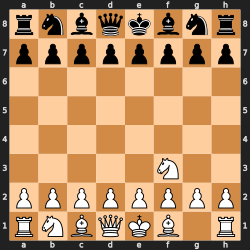

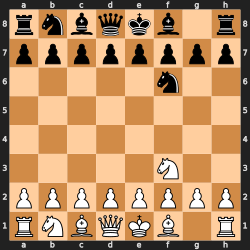

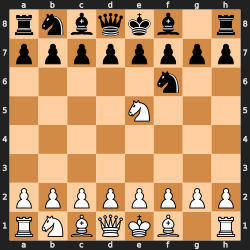

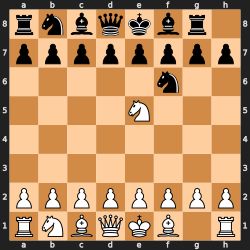

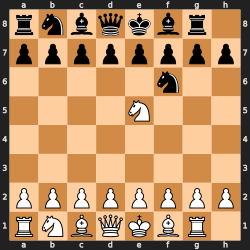

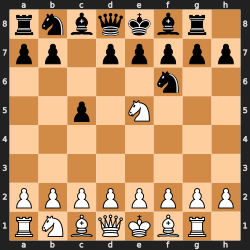

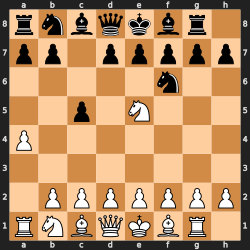

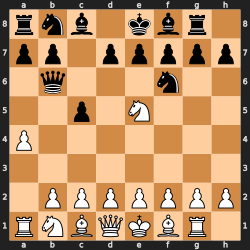

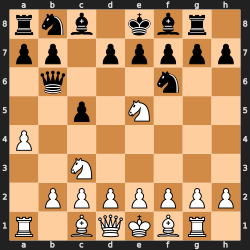

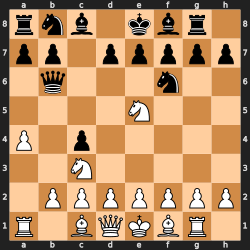

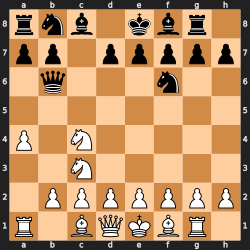

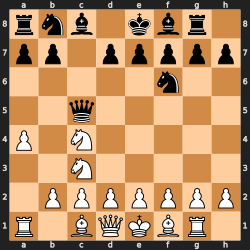

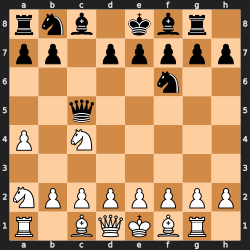

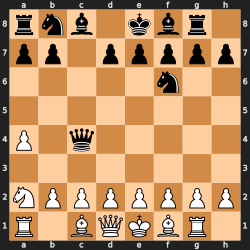

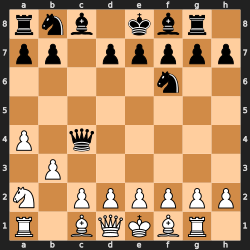

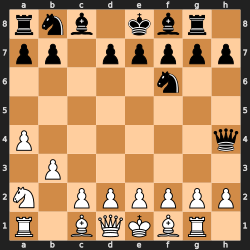

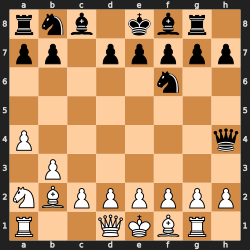

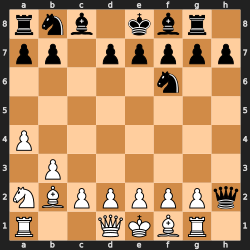

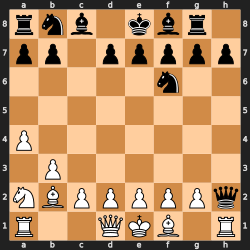

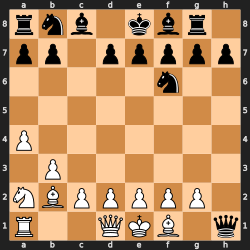

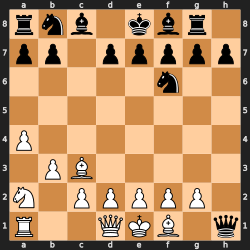

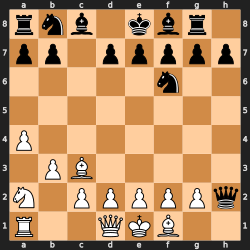

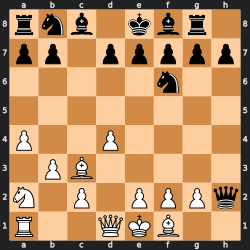

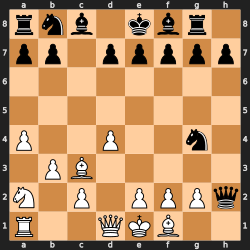

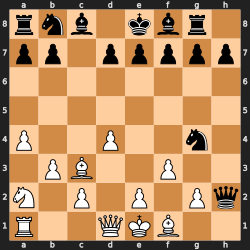

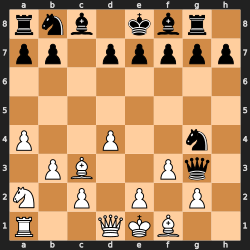

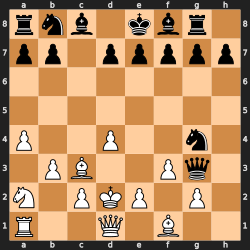

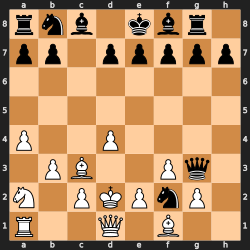

Game Over
Result:  *


In [98]:
game.play(display_boards=True)

In [98]:
from BriethSearchPlayer import BriethSearchPlayer

p = BriethSearchPlayer(estimator=ModelEstimator(model), depth=1)

In [108]:
board = Board()
print(p._best_value_with_move(board, depth=1))

(array([-0.06219714], dtype=float32), Move.from_uci('g1h3'))


In [109]:
66

In [110]:
print(p._best_value_with_move(board, depth=1))

(array([0.06219714], dtype=float32), Move.from_uci('g8h6'))


In [96]:
model.predict(np.expand_dims(board_to_3d_array(game.history[2]), axis=0))

1/1 [==============================] - 0s 31ms/step


array([[0.12964487]], dtype=float32)

In [126]:
Board().turn == chess.BLACK

False

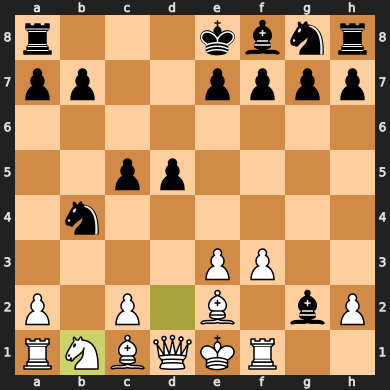

In [148]:
game.history[18]